<a href="https://colab.research.google.com/github/salaghati/datamining_lab5/blob/main/19522459_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Trinh Anh Tu - 19522459
#GitHub:https://github.com/salaghati/datamining_lab5

In [ ]:
import pandas as pd 

questions_per_library = pd.read_csv(
    '/content/stackoverflow.csv', parse_dates=True, index_col='creation_date'
).loc[:,'pandas':'bokeh'].resample('1M').sum().cumsum().reindex(
    pd.date_range('2008-08', '2021-10', freq='M')
).fillna(0)
questions_per_library.tail()

,pandas,matplotlib,numpy,seaborn,geopandas,geoviews,altair,yellowbrick,vega,holoviews,hvplot,bokeh
2021-05-31,200734.0,57853.0,89812.0,6855.0,1456.0,57.0,716.0,46.0,532.0,513.0,84.0,4270.0
2021-06-30,205065.0,58602.0,91026.0,7021.0,1522.0,57.0,760.0,48.0,557.0,521.0,88.0,4308.0
2021-07-31,209235.0,59428.0,92254.0,7174.0,1579.0,62.0,781.0,50.0,572.0,528.0,89.0,4341.0
2021-08-31,213410.0,60250.0,93349.0,7344.0,1631.0,62.0,797.0,52.0,589.0,541.0,92.0,4372.0
2021-09-30,214919.0,60554.0,93797.0,7414.0,1652.0,63.0,804.0,54.0,598.0,542.0,92.0,4386.0


In [ ]:
#2. Import the FuncAnimation class
from matplotlib.animation import FuncAnimation

In [ ]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#3. Write a function fro generating the initial plot

import matplotlib.pyplot as plt 
from matplotlib import ticker

def bar_plot(data): 
  fig, ax = plt.subplots(figsize=(8,6))
  sort_order = data.last('1M').squeeze().sort_values().index
  bars = [
      bar.set_label(label) for label, bar in
      zip(sort_order, ax.barh(sort_order, [0] * data.shape[1]))
  ]

  ax.set_xlabel('total questions', fontweight='bold')
  ax.set_xlim(0,250_000)
  ax.xaxis.set_major_formatter(ticker.EngFormatter())
  ax.xaxis.set_tick_params(labelsize=12)
  ax.yaxis.set_tick_params(labelsize=12)

  for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

    fig.tight_layout()

    return fig,ax

(<Figure size 800x600 with 1 Axes>, <Axes: xlabel='total questions'>)

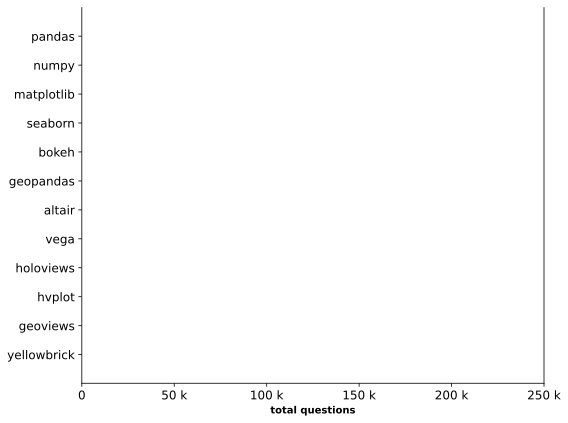

In [ ]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
bar_plot(questions_per_library)

In [ ]:
#4. Write a function for generating annotations and plot text

def generate_plot_text(ax):
  annotations = [
      ax.annotate(
          '', xy=(0, bar.get_y() + bar.get_height()/2),
          ha='left', va='center'
      ) for bar in ax.patches
  ]

  time_text = ax.text(
      0.9, 0.1, '', transform=ax.transAxes,
      fontsize=15, ha='center', va='center'
  )
  return annotations, time_text

In [ ]:
#5. Define the plot update function

def update(frame, *, ax, df, annotations, time_text):
  data = df.loc[frame,: ]

  #update bars
  for rect, text in zip(ax.patches, annotations):
    col = rect.get_label()
    if data[col]:
      rect.set_width(data[col])
      text.set_x(data[col])
      text.set_text(f' {data[col]:,.0f}')
    #update time

    time_text.set_text(frame.strftime('%b\n%Y'))

In [ ]:
#6. Bind arguments to the update function

from functools import partial

def bar_plot_init(questions_per_library):
  fig, ax = bar_plot(questions_per_library)
  annotations, time_text = generate_plot_text(ax)

  bar_plot_update = partial(
      update, ax=ax, df=questions_per_library,
      annotations=annotations, time_text=time_text
  )

  return fig,bar_plot_update

In [ ]:
#7. Animate the plot

fig,update_func = bar_plot_init(questions_per_library)

ani = FuncAnimation(
    fig, update_func, frames=questions_per_library.index, repeat=False
)
ani.save(
    '../media/stackorverflow_questions.mp4',
    writer='ffmpeg',fps=10, bitrate=100,dpi=300
)
plt.close()

In [ ]:
from IPython import display

display.Video(
    '../media/stackorverflow_questions.mp4', width=600, height=400,
    embed=True, html_attributes='controls muted autoplay'
)

In [ ]:
#Animationg Distributions overtime
#1. Create a dataset of daily subway entries
subway = pd.read_csv(
    '/content/NYC_subway_daily.csv', parse_dates=['Datetime'],
    index_col=['Borough','Datetime']
)
subway_daily = subway.unstack(0)
subway_daily.head()


Entries                                    Exits            \
Borough            Bk        Bx          M         Q        Bk        Bx   
Datetime                                                                   
2017-02-04   617650.0  247539.0  1390496.0  408736.0  417449.0  148237.0   
2017-02-05   542667.0  199078.0  1232537.0  339716.0  405607.0  139856.0   
2017-02-06  1184916.0  472846.0  2774016.0  787206.0  761166.0  267991.0   
2017-02-07  1192638.0  470573.0  2892462.0  790557.0  763653.0  270007.0   
2017-02-08  1243658.0  497412.0  2998897.0  825679.0  788356.0  275695.0   

                                 
Borough             M         Q  
Datetime                         
2017-02-04  1225689.0  279699.0  
2017-02-05  1033610.0  268626.0  
2017-02-06  2240027.0  537780.0  
2017-02-07  2325024.0  544828.0  
2017-02-08  2389534.0  559639.0

In [ ]:
manhattan_entries = subway_daily['Entries']['M']

In [ ]:
#2. Determine the bun ranges for the histograms

import numpy as np

count_per_bin, bin_rages = np.histogram(manhattan_entries, bins=30)

In [ ]:
#3. Write a function for generating the initaial histogram subplots
def subway_histogram(data, bins, date_range):
  _, bin_rages= np.histogram(data, bins=bins)

  weekday_mask = data.index.weekday < 5
  configs = [
      {'label': 'Weekend', 'mask': ~weekday_mask, 'ymax' : 60},
      {'label': 'Weekend', 'mask': weekday_mask, 'ymax' : 120},
  ]

  fig, axes = plt.subplots(1,2,figsize=(8,4), sharex=True)
  for ax, config in zip(axes, configs):
    _, _, config['hist'] = ax.hist(
        data[config['mask']].loc[date_range], bin_rages, ec='black'
    )
    ax.xaxis.set_major_formatter(ticker.EngFormatter())
    ax.set(
        xlim=(0, None), ylim=(0,config['ymax']),
        xlabel=f'{config["label"]} Entries'
    )
    for spine in ['top','right']:
      ax.spines[spine].set_visible(False)

  axes[0].set_ylabel('Frequency')
  fig.suptitle('Histogram of Daily Subway Entries in Manhattan')
  fig.tight_layout()

  return fig, axes, bin_rages, configs

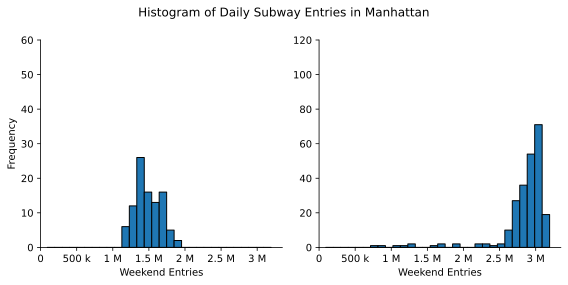

In [ ]:
_ = subway_histogram(manhattan_entries, bins=30, date_range='2017')

In [ ]:
#4. Write a function for generating an annotation for the time period

def add_time_text(ax):
  time_text = ax.text(
      0.15, 0.9, '', tranform=ax.transAxes,
      fontsize=15, ha='center', va='center'
  )

  return time_text

In [ ]:
#5. Define the plot update function

def update(frame, *, data, configs, time_text, bin_ranges):
  artists = []

  time = frame.strftime('%b\n%Y')
  if time != time_text.get_text():
    time_text.set_text(time)
    artists.append(time_text)

    for config in configs:
      time_frame_mask = \
      (data.index > frame - pd.Timedelta(days=365)) & (data.index <= frame)
      counts,_=np.histogram(
          data[time_frame_mask & config['mask']],
          bin_ranges
      )
      for count, rect in zip(counts, cofig['hist'].patches):
        if count != rea

In [ ]:
import geoviews as gv
import geoviews.feature as gf
import holoviews as hv

gv.extenesion('matplotlib')

ModuleNotFoundError: ignored

In [ ]:
#3. Define a function for plotting earthquakes on a map using GeoViews

import calendar 

def plot_earthquakes(data, month_num):
  points = gv.Points(
      data.query(f'month == {month_num}'),
      kdims=['longitude','latitude'],
      vdims=['mag']
  ).redim.range(mag=(-2,10), latitude=(-90,90))

  #Create an overlay by combining Cartopy features and the ponts with*
  orverlay = gf.land * gf.coastline * gf.borders * points
  
  return overlay.opts(
      gv.opts.Points(color='mag', cmap='fire_r', colorbar=True, alpha=0.75),
      gv.opts.Orverlay(
          global_extent=False, title=f'{calendar.month_name[month_num]}',fontscale=2
      )
  )